# Пример с распознаванием цифр

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [2]:
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

Пример первой цифры

In [4]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [7]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

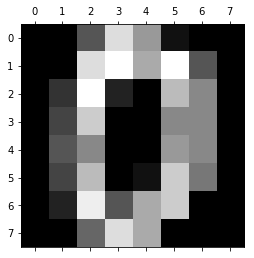

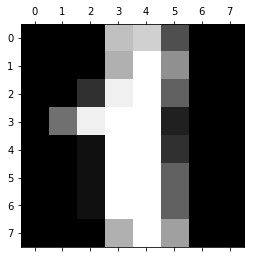

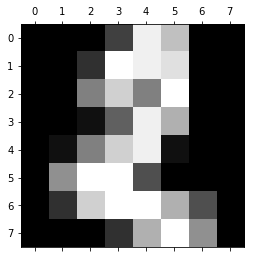

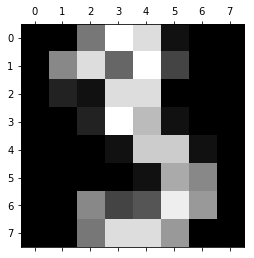

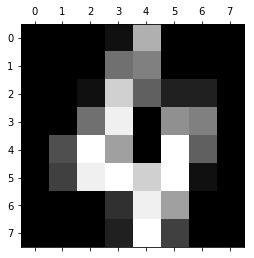

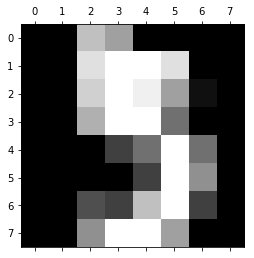

In [8]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [9]:
X_digits = digits.data
Y_digits = digits.target

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

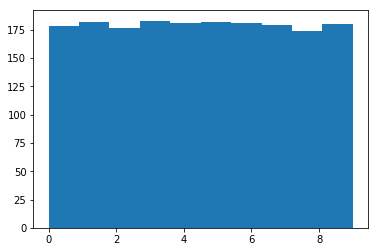

In [45]:

plt.hist(Y_digits, align='mid')

In [ ]:
#классы сбалансированы

Количество цифр в данных

In [10]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [11]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [12]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [13]:
X_test = X_digits[split:]
Y_test = Y_digits[split]

In [21]:
len(X_train[0])

64

In [50]:
for i in range(3,23):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    print(i,knn.score(X_test, Y_test))

3 0.9666666666666667
4 0.9666666666666667
5 0.9611111111111111
6 0.9611111111111111
7 0.9611111111111111
8 0.9611111111111111
9 0.9611111111111111
10 0.9611111111111111
11 0.9611111111111111
12 0.9611111111111111
13 0.9611111111111111
14 0.9555555555555556
15 0.9555555555555556
16 0.9555555555555556
17 0.9555555555555556
18 0.9555555555555556
19 0.9555555555555556
20 0.9555555555555556
21 0.9555555555555556
22 0.9555555555555556


In [ ]:
#3 лучше всего

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.9666666666666667

In [ ]:
#неплохо

In [24]:
y_pred_tr=knn.predict(X_train)

In [29]:
y_pred=knn.predict(X_test)

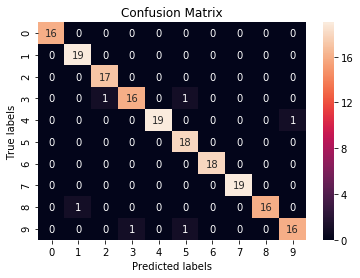

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d", xticklabels=True, yticklabels=True )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [53]:
wrong_pred=[]
s=0
for i in zip(y_pred, Y_test): 
    if i[0]!=i[1]:
        print(i)
        wrong_pred.append(s)
    s+=1

(9, 4)
(3, 9)
(5, 9)
(2, 3)
(5, 3)
(1, 8)


In [54]:
wrong_pred

[11, 41, 45, 110, 148, 173]

In [ ]:
#визуализируем неверные предсказания

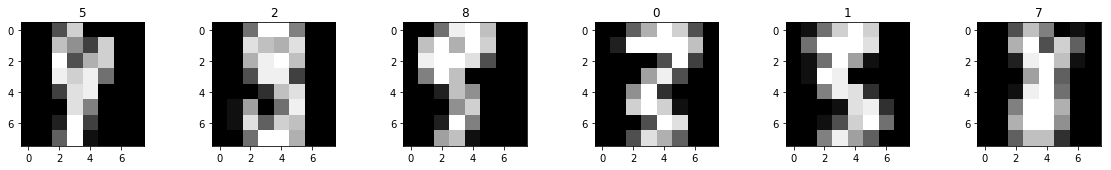

In [80]:
fig = plt.figure(figsize=(20, 5))
for i, img in enumerate(X_test[wrong_pred], 1):
    subplot = fig.add_subplot(2, 6, i)
    plt.imshow(img.reshape(8, 8), cmap='gray');
    #plt.matshow(img)
    subplot.set_title('%s' % y_pred[i - 1] );

In [ ]:
#действительно, не очень понятные цифры. Вряд ли можно сильно улучшить классификатор

In [ ]:
#конец решения